# Network II - Robustness

**Robustness**, the ability to withstand failures and perturbations, is a critical attribute of many complex systems including complex networks.

The study of robustness in complex networks is important for many fields. In ecology, robustness is an important attribute of ecosystems, and can give insight into the reaction to disturbances such as the extinction of species. For biologists, network robustness can help the study of diseases and mutations, and how to recover from some mutations. In economics, network robustness principles can help understanding of the stability and risks of banking systems. And in engineering, network robustness can help to evaluate the resilience of infrastructure networks such as the Internet or power grids.

## From percolation theory to Robustness

![Nodes remove](http://networksciencebook.com/images/ch-08/figure-8-3.jpg)

The removal of a single node has only limited impact on a network’s integrity. The removal of several nodes, however, can break a network into several isolated components. Obviously, the more nodes we remove, the higher are the chances that we damage a network, prompting us to ask: How many nodes do we have to delete to fragment a network into isolated components? The removement of nodes or links is known as inverse percolation

![history](http://networksciencebook.com/images/ch-08/figure-8-27.jpg)

We discussed site percolation several weeks ago, we use the probability $p_{\infty}$ as an order parameter. In the network theory, instead of an infinity cluster, we focus on the object so called the "giant component". A giant component is a connected component of a network that contains a significant proportion of the entire nodes in the network.

## Molloy-Reed Criterion
The mathematical derivation for the threshold at which a complex network will lose its giant component is based on the Molloy–Reed criterion.

$$\kappa = \frac{\left< k^2 \right>}{\left< k \right>} > 2 $$

This criterion is based on the fact that for a giant component to exist each node that belongs to it must be connected to at least two other nodes on average. (This criteria was first derived by Molloy and Reed in 1995, then independently derived by Reuven Cohen, Shlomo Havlin in 2000)

In [61]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def Molloy_Reed(net):
    degrees = np.array(net.degree())
    return (degrees ** 2).mean() / degrees.mean()

the criterion is: 1.6666666666666667


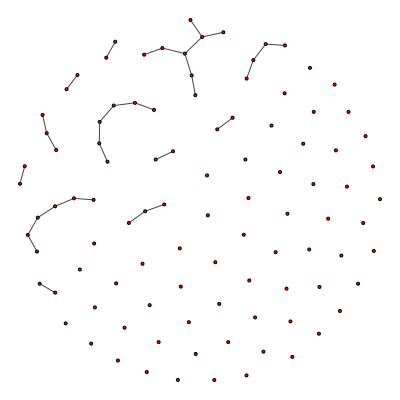

In [95]:
net = ig.Graph.Erdos_Renyi(100, p=1/150)

print('the criterion is: ' + str(Molloy_Reed(net)))
ig.plot(net, bbox=(400, 400),vertex_size=3)

the criterion is: 2.0


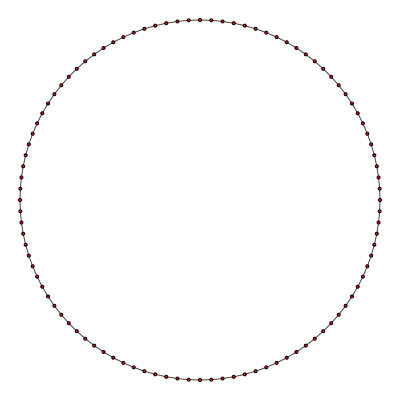

In [89]:
net = ig.Graph.Ring(100)

print('the criterion is: ' + str(Molloy_Reed(net)))
layout = ig.Graph.layout_circle(net)
ig.plot(net, bbox=(400, 400),vertex_size=3, layout=layout)

the criterion is: 6.0316205533596845


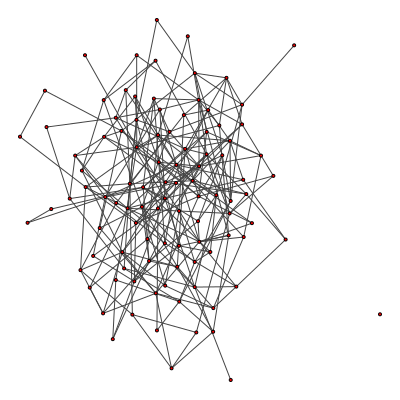

In [94]:
net = ig.Graph.Erdos_Renyi(100, p=1/20)

print('the criterion is: ' + str(Molloy_Reed(net)))
ig.plot(net, bbox=(400, 400),vertex_size=3)

### Percolation on Erdos Renyi network and scale-free network

In [104]:
def P_inf(net):
    if Molloy_Reed(net) < 2:
        return 0
    else:
        return max(net.components().sizes()) / len(net.vs)

In [146]:
net = ig.Graph.Erdos_Renyi(100, p=1/150)
np.random.choice(np.arange(len(net.vs)), size=50, replace=False)

array([37,  9, 32, 16, 28, 80, 73, 76, 57, 45, 48, 91, 92,  3, 42,  0, 77,
        6, 69, 55, 23, 36, 66, 71, 74, 87, 58, 84, 46, 94,  7,  8, 19, 86,
       82, 83, 27, 33, 75, 13, 63,  5, 99, 22, 35, 65, 26, 52, 10, 30])

In [105]:
def random_remove(net, p):
    copied_net = net.copy()
    removed_nodes = np.random.choice(np.arange(len(net.vs)), size=int(p * len(net.vs)), replace=False)
    copied_net.delete_vertices(removed_nodes)
    return copied_net

In [114]:
N = 10000
mean_k = 3
net = ig.Graph.Erdos_Renyi(N, mean_k / N)
p_array = np.arange(0, 1, 0.05)

p_inf_ER = np.zeros_like(p_array)
for j, p in enumerate(p_array):
    for i in range(100):
        new_net = random_remove(net, p)
        p_inf_ER[j] += P_inf(new_net)
    p_inf_ER[j] = p_inf_ER[j] / 100

Text(0.5, 0, 'f')

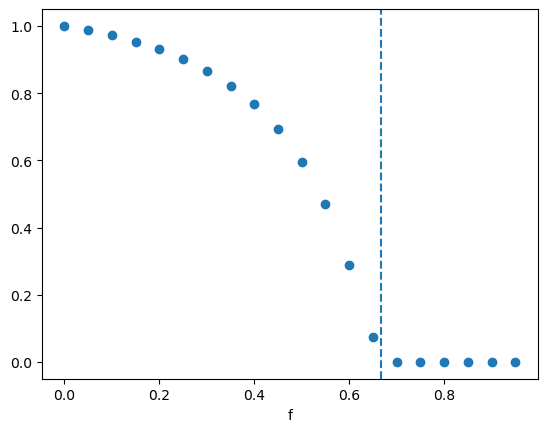

In [115]:
plt.plot(p_array, p_inf_ER / p_inf_ER[0], 'o')
plt.axvline(1 - 1 / mean_k, linestyle='dashed')
plt.xlabel('f')

In [116]:
N = 10000
net = ig.Graph.Barabasi(N, 1)
p_array = np.arange(0, 1, 0.05)

p_inf_BA = np.zeros_like(p_array)
for j, p in enumerate(p_array):
    for i in range(100):
        new_net = random_remove(net, p)
        p_inf_BA[j] += P_inf(new_net)
    p_inf_BA[j] = p_inf_BA[j] / 100

Text(0.5, 0, 'f')

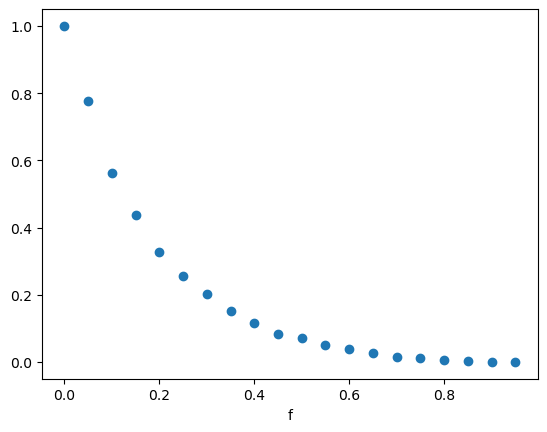

In [119]:
plt.plot(p_array, p_inf_BA / p_inf_BA[0], 'o')
plt.xlabel('f')

We can clearly found that for random network, there is a threshold $f_c = \frac{1}{\left< k \right>}$. But the Barabási-Albert network seems do not have a threshold, which means it is very stable under random failure.

## Critical threshold under random failures

The random removal of an f fraction of nodes has two consequences:

* It alters the degree of some nodes, as nodes that were previously connected to the removed nodes will lose some links $k \rightarrow k^{'}$

* Consequently, it changes the degree distribution, as the neighbors of the missing nodes will have an altered degree $p_k \rightarrow p_{k^{'}}^{'}$

The probability that a node with degree $k$ becomes a node with degree $k^{'}$ with probability

$$
\left(\begin{array}{c}
k \\
k^{\prime}
\end{array}\right) f^{k-k^{\prime}}(1-f)^{k^{\prime}} \quad k^{\prime} \leq k
$$

The new node with degree $k^{'}$ in the new network is:

$$
p_{k^{\prime}}^{\prime}=\sum_{k=k^{\prime}}^{\infty} p_k\left(\begin{array}{l}
k \\
k^{\prime}
\end{array}\right) f^{k-k^{\prime}}(1-f)^{k^{\prime}}
$$

The threshold will be the point that makes the new $\kappa = 2$

Let us assume that we know $\left< k \right>$ and $\left< k^2 \right>$, our goal is to calculate $\left< k^{'} \right>$ and $\left< k^{'2} \right>$

$$
\begin{aligned}
\left\langle k^{\prime}\right\rangle_f & =\sum_{k^{\prime}=0}^{\infty} k^{\prime} p_{k^{\prime}}^{\prime} \\
& =\sum_{k^{\prime}=0}^{\infty} k^{\prime} \sum_{k=k^{\prime}}^{\infty} p_k\left(\frac{k !}{k^{\prime} !\left(k-k^{\prime}\right) !}\right) f^{k-k^{\prime}}(1-f)^{k^{\prime}} \\
& =\sum_{k^{\prime}=0}^{\infty} \sum_{k=k^{\prime}}^{\infty} p_k \frac{k(k-1) !}{\left(k^{\prime}-1\right) !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}-1}(1-f)
\end{aligned}
$$

The sum $\sum_{k^{'}=0}^\infty \sum_{k=k^{'}}^\infty$ is performed over the triangle shown in the figure below:

![sum](http://networksciencebook.com/images/ch-08/figure-8-28.jpg)

But we can also apply the sum in another direction:
$$
\sum_{k^{\prime}=0}^{\infty} \sum_{k=k^{\prime}}^{\infty}=\sum_{k=0}^{\infty} \sum_{k^{\prime}=0}^k
$$

Then

$$
\left\langle k^{\prime}\right\rangle_f=\sum_{k=0}^{\infty} \sum_{k^{\prime}=0}^k p_k \frac{k(k-1) !}{\left(k^{\prime}-1\right) !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}-1}(1-f)
$$
$$
=\sum_{k=0}^{\infty}(1-f) k p_k \sum_{k^{\prime}=0}^k \frac{k(k-1) !}{\left(k^{\prime}-1\right) !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}-1}
$$

From the binomial theorem

$$
\sum_{k^{\prime}=0}^k \frac{k(k-1) !}{\left(k^{\prime}-1\right) !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}-1}
 = (1 - f + f) ^ {k - 1} = 1
$$

As a result

$$  \left\langle k^{\prime}\right\rangle_f = (1 - f) \left< k \right>$$

Let consider the calculation of $\left< k ^ {' 2}\right>_f$

$$
\begin{aligned}
\left\langle k^{\prime 2}\right\rangle_f & =\left\langle k^{\prime}\left(k^{\prime}-1\right)+k^{\prime}\right\rangle_f \\
& =\left\langle k^{\prime}\left(k^{\prime}-1\right)\right\rangle_f+\left\langle k^{\prime}\right\rangle_f
\end{aligned}
$$

The calculation is very similar as what we did to calculate $\left\langle k^{\prime}\right\rangle_f$

$$
\begin{aligned}
\left\langle k^{\prime}\left(k^{\prime}-1\right)\right\rangle_f & =\sum_{k^{\prime}=0}^{\infty} k^{\prime}\left(k^{\prime}-1\right) p_{k^{\prime}}^{\prime} \\
& =\sum_{k^{\prime}=0}^{\infty} k^{\prime}\left(k^{\prime}-1\right) \sum_{k=k^{\prime}}^{\infty} p_k\left(\begin{array}{c}
k \\
k^{\prime}
\end{array}\right) f^{k-k^{\prime}}(1-f)^{k^{\prime}} \\
& =\sum_{k=0}^{\infty} k^{\prime}\left(k^{\prime}-1\right) \sum_{k=k^{\prime}}^\infty p_k \frac{𝑘!}{k^{\prime} !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}} \\
& =\sum_{k=0}^{\infty} \sum_{k=0}^k p_k \frac{k !}{\left(k^{\prime}-2\right) !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}-2}(1-f)^2 \\
& =\sum_{k=0}^{\infty}(1-f)^2 k(k-1) p_k \sum_{k^{\prime}=0}^k \frac{(k-2) !}{\left(k^{\prime}-2\right) !\left(k-k^{\prime}\right) !} f^{k-k^{\prime}}(1-f)^{k^{\prime}-2} \\
& =\sum_{k=0}^{\infty}(1-f)^2 k(k-1) p_k \sum_{k^{\prime}=0}^k\left(\begin{array}{l}
k-2 \\
k^{\prime}-2
\end{array}\right) f^{k-k^{\prime}}(1-f)^{k^{\prime}-2} \\
& =\sum_{k=0}^{\infty}(1-f)^2 k(k-1) p_k \\
& =(1-f)^2\langle k(k-1)\rangle
\end{aligned}
$$

Hence

$$
\begin{aligned}
\left\langle k^2\right\rangle_f & =\left\langle k^{\prime}\left(k^{\prime}-1\right)+k^{\prime}\right\rangle_f \\
& =\left\langle k^{\prime}\left(k^{\prime}-1\right)\right\rangle_f+\left\langle k^{\prime}\right\rangle_f \\
& =(1-f)^2\langle k(k-1)\rangle+(1-f)\langle k\rangle \\
& =(1-f)^2\left(\left\langle k^2\right\rangle-\langle k\rangle\right)+(1-f)\langle k\rangle \\
& =(1-f)^2\left\langle k^2\right\rangle-(1-f)^2\langle k\rangle+(1-f)\langle k\rangle \\
& =(1-f)^2\left\langle k^2\right\rangle-\left(-f^2+2 f-1+1-f\right)\langle k\rangle \\
& =(1-f)^2\left\langle k^2\right\rangle+f(1-f)\langle k\rangle
\end{aligned}
$$

Solving the equation $\kappa=\frac{\left\langle k^{\prime 2}\right\rangle_f}{\left\langle k^{\prime}\right\rangle_f}=2$ we can get:

$$
f_c=1-\frac{1}{\frac{\left\langle k^2\right\rangle}{\langle k\rangle}-1}
$$

## Attack tolerance

The important role the hubs play in holding together a scale-free network motivates our next question: What if we do not remove the nodes randomly, but go after the hubs? That is, we first remove the highest degree node, followed by the node with the next highest degree and so on.

In [151]:
np.argsort([2, 5, 10, 8])[::-1][:3]

array([2, 3, 1], dtype=int64)

In [120]:
def target_attack(net, p):
    copied_net = net.copy()
    if p == 0:
        return copied_net
    removed_nodes = np.argsort(net.degree())[::-1][:int(p * len(net.vs))]
    copied_net.delete_vertices(removed_nodes)
    return copied_net

In [131]:
N = 10000
mean_k = 3
net = ig.Graph.Erdos_Renyi(N, mean_k / N)
p_array = np.arange(0, 1, 0.05)

p_inf_ER = np.zeros_like(p_array)
for j, p in enumerate(p_array):
    new_net = target_attack(net, p)
    p_inf_ER[j] = P_inf(new_net)

C:\Users\45805\AppData\Local\Temp\ipykernel_6360\3495574193.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (degrees ** 2).mean() / degrees.mean()


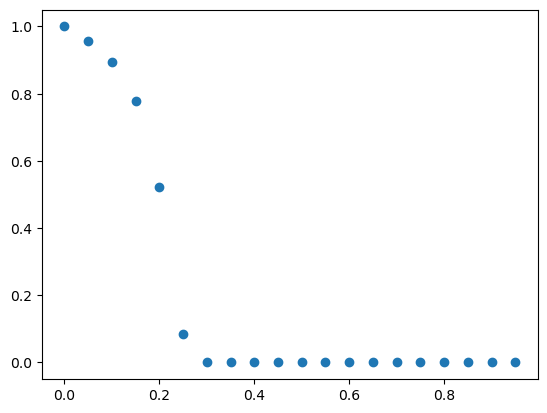

In [133]:
plt.plot(p_array, p_inf_ER / p_inf_ER[0], 'o')

In [134]:
N = 10000
mean_k = 4
net = ig.Graph.Barabasi(N, 2)
p_array = np.arange(0, 0.9, 0.05)

p_inf_BA = np.zeros_like(p_array)
for j, p in enumerate(p_array):
    new_net = target_attack(net, p)
    p_inf_BA[j] = P_inf(new_net)

C:\Users\45805\AppData\Local\Temp\ipykernel_6360\3495574193.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (degrees ** 2).mean() / degrees.mean()


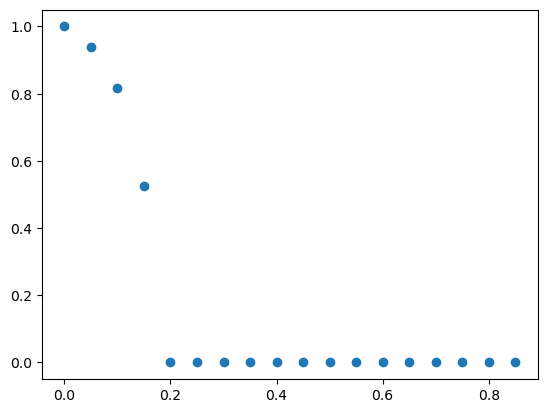

In [135]:
plt.plot(p_array, p_inf_BA / p_inf_BA[0], 'o')

Although the Barabási-Albert network is robust on random errors, it is easier to be destroied under target attack compared with Erdos Renyi network

|Network | Random Failures (Real Network)| Random Failures (Randomized Network) | Attack(Real Network)|
|---|---|---|---|
|Internet|	0.92|	0.84|	0.16|
|WWW|	0.88|	0.85|	0.12|
|Power Grid|	0.61|	0.63|	0.20|
|Mobile Phone Calls|	0.78|	0.68|	0.20|
|Email|	0.92|	0.69|	0.04|
|Science Collaboration|	0.92|	0.88|	0.27|
|Actor Network|	0.98|	0.99|	0.55|
|Citation Network|	0.96|	0.95|	0.76|
|E. Coli Metabolism|	0.96|	0.90|	0.49|
|Protein Interactions|	0.88|	0.66|	0.06|

# Exercises

1. The critical threshold for the random failure is 
$$f_c = 1 - \frac{1}{\frac{\left< k^2 \right>}{\left< k \right>} - 1}$$

please prove that for a random network
$$f_c^{ER} = 1 - \frac{1}{\left<k\right>}$$

2. Consider a network's degree distribution is a power-law distribution with an exponential cutoff:
   $$f(x) \propto x^{-\gamma} e^{-\beta x}$$
calculate the critical threshold $f_c$

3. Consider the real airport network, discuss the robustness and attack tolerance through percolation. Explain the results based on the degree distribution.

In [138]:
import pandas as pd
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [139]:
G_airtraffic = ig.Graph.DataFrame(routes.loc[:, ['source', 'dest']])